In [11]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [9]:
df1 = pd.read_csv("https://data.gov.lv/dati/dataset/633b5005-fe7f-44bd-b17c-4995d359f9b0/resource/975fb5a2-1be4-4183-b404-b32afe60c01a/download/kopa_cesu_pils_apmekletaju_veidi_pa_gadiem_menesiem.csv", sep = ';')

In [10]:
print(df1)

       Mēnesis  Ārzemnieku grupa  Latvijas grupa  Ģimene  Pāris  Viens  \
0     Janvāris               492             110     576    385      9   
1    Februāris                69              94      90     94     15   
2        Marts               238             348     257    154     22   
3      Aprīlis               332             254     517    258     41   
4        Maijs              1257            2295     972    673     81   
..         ...               ...             ...     ...    ...    ...   
67     Augusts              2114             547    4971   3026    357   
68  Septembris              1369             482    1111   1213    181   
69    Oktobris               601             721    1587    886    121   
70   Novembris               300             206     738    394     64   
71   Decembris               198             126     357    234     27   

    Draugi  Skolēnu grupa  Gads  
0      322            189  2014  
1      145            196  2014  
2      34

In [52]:
import itertools

months = df1['Mēnesis'].unique()
years = df1['Gads'].unique()

m_y = list(itertools.product(months, years))

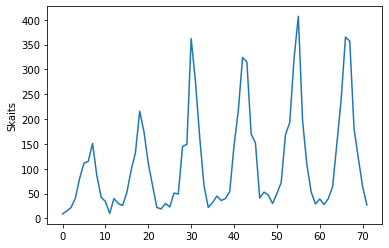

In [30]:
plt.plot(df1['Viens'])
plt.ylabel('Skaits')
plt.show()

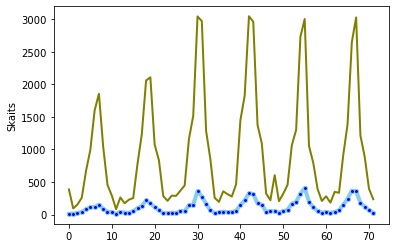

In [33]:
plt.plot( df1['Viens'], data=df1, marker='o', markerfacecolor='blue', markersize=4, color='skyblue', linewidth=4)
plt.plot( df1['Pāris'], data=df1, marker='', color='olive', linewidth=2)

plt.ylabel('Skaits')
plt.show()

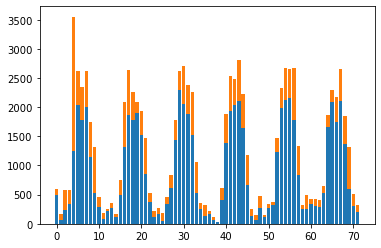

In [78]:
foreigners = df1['Ārzemnieku grupa'].to_list()
locals = df1['Latvijas grupa'].to_list()
width = 0.8

x = range(0, 72)

plt.bar(x, foreigners, width, label='Foreigners')
plt.bar(x, locals, width, bottom=foreigners, label='Locals')

plt.show()

In [79]:
new_df = df1.loc['Janvāris']

In [85]:
# df.set_index('Gads', inplace = True)
# df.drop(colums=['Mēnesis'])

print(new_df)


      Ārzemnieku grupa  Latvijas grupa  Ģimene  Pāris  Viens  Draugi  \
Gads                                                                   
2014               492             110     576    385      9     322   
2015               224              33     436    262     40     170   
2016               172             100     347    290     30     237   
2017               176              35     413    356     45     316   
2018               269             202     775    604     47     241   
2019               338              85     509    280     39     329   

      Skolēnu grupa  
Gads                 
2014            189  
2015             53  
2016             52  
2017             73  
2018            160  
2019            157  


In [88]:
summarized_df = new_df.sum(axis = 0, skipna=True)
print(summarized_df)

Ārzemnieku grupa    1671
Latvijas grupa       565
Ģimene              3056
Pāris               2177
Viens                210
Draugi              1615
Skolēnu grupa        684
dtype: int64


In [93]:
count_january = summarized_df.to_list()
print(count_january)

[1671, 565, 3056, 2177, 210, 1615, 684]


([<matplotlib.patches.Wedge at 0x2031962f220>,
 [Text(0.9512395785123735, 0.5523977410087789, 'Ārzemnieku grupa'),
  Text(0.36753033739396, 1.0367841873288202, 'Latvijas grupa'),
  Text(-0.7886386405995613, 0.7668435919751017, 'Ģimene'),
  Text(-0.7040551127982521, -0.8451664913747118, 'Pāris'),
  Text(0.06265300676038282, -1.0982142781551711, 'Viens'),
  Text(0.6494742407133715, -0.8877968296011142, 'Draugi'),
  Text(1.0745897596208682, -0.2350677530372144, 'Skolēnu grupa')])

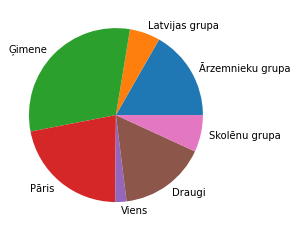

In [96]:
labels = (new_df.columns).to_list()
sizes = count_january


plt.pie(count_january, labels = labels)